[詳解 ディープラーニング ~TensorFlow・Kerasによる時系列データ処理~](https://www.amazon.co.jp/dp/4839962510) に沿って動かしてみます

# 3章　ニューラルネットワーク（後半）

## 3.5 多クラスロジスティック回帰

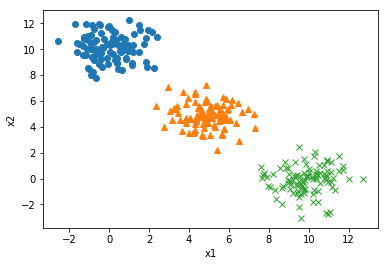

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

'''
データの生成
'''
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'^')
plt.plot(X3[:,0],X3[:,1],'x')
plt.xlabel("x1")
plt.ylabel("x2")

In [2]:
'''
モデル設定
'''
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),
                               reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [3]:
'''
モデル学習
'''
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 50  # ミニバッチサイズ
n_batches = N // batch_size

# ミニバッチ学習
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
    
    print("epoc:" ,epoch)
    print("   w:" ,sess.run(W))
    print("   b:" ,sess.run(b))

print("**** train finish ****")

print("w:" ,sess.run(W))
print("b:" ,sess.run(b))
        
        

epoc: 0
   w: [[-0.38313058  0.09856445  0.28456619]
 [ 0.26327565  0.11545909 -0.37873474]]
   b: [-0.01409902  0.02472855 -0.01062952]
epoc: 1
   w: [[-0.50611389  0.14210841  0.36400554]
 [ 0.3706499   0.13728492 -0.50793487]]
   b: [-0.01814101  0.03526382 -0.01712281]
epoc: 2
   w: [[-0.59270465  0.15630458  0.43640009]
 [ 0.43390161  0.16014709 -0.59404874]]
   b: [-0.02279811  0.04270132 -0.01990321]
epoc: 3
   w: [[-0.65814108  0.17078319  0.48735791]
 [ 0.48755571  0.17208369 -0.65963948]]
   b: [-0.02607446  0.04875067 -0.02267621]
epoc: 4
   w: [[-0.71184295  0.19440928  0.5174337 ]
 [ 0.52925223  0.18669502 -0.71594739]]
   b: [-0.02915178  0.05564693 -0.02649515]
epoc: 5
   w: [[-0.76220191  0.21493907  0.54726291]
 [ 0.55076629  0.21253556 -0.76330191]]
   b: [-0.03374689  0.06311526 -0.02936836]
epoc: 6
   w: [[-0.79748619  0.2156909   0.58179533]
 [ 0.59411359  0.20664136 -0.80075508]]
   b: [-0.03452959  0.06521688 -0.03068728]
epoc: 7
   w: [[-0.8353644   0.22393841  

-2.55298981583
12.6962240526
---X1---
-1.09313
0.795459
-0.0591481
---X2---
0.300588
0.293977
0.108083
---X3---
0.792541
-1.08944
-0.0489351


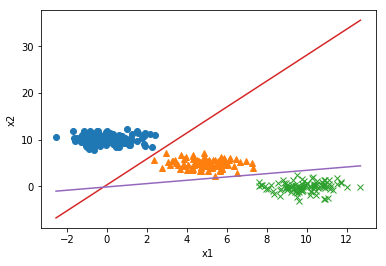

In [4]:
# グラフ描画用　Xの範囲を抽出
x1_min = X[:,0].min()
x1_max = X[:,0].max()
print(x1_min)
print(x1_max)

plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'^')
plt.plot(X3[:,0],X3[:,1],'x')
plt.xlabel("x1")
plt.ylabel("x2")
#plt.ylim(-10,40)

# 学習結果をNdArrayに詰める
result_w = sess.run(W)
result_b = sess.run(b)

# X1(0,10付近のグループ)
X1_w1 = result_w[0,0]
X1_w2 = result_w[1,0]
X1_b = result_b[0]
print("---X1---")
print(X1_w1)
print(X1_w2)
print(X1_b)


# X2(5,5付近のグループ)
X2_w1 = result_w[0,1]
X2_w2 = result_w[1,1]
X2_b = result_b[1]
print("---X2---")
print(X2_w1)
print(X2_w2)
print(X2_b)

# X3(10,0付近のグループ)
X3_w1 = result_w[0,2]
X3_w2 = result_w[1,2]
X3_b = result_b[2]
print("---X3---")
print(X3_w1)
print(X3_w2)
print(X3_b)

# X1とX2の分類直線
x1 = np.linspace(x1_min, x1_max, 5)
# X1_w1 * x1 + X1_w2 * x2 + X1_b = X2_w1 * x1 + X2_w2 * x2 + X2_b
x2a = ((X2_w1 - X1_w1) * x1) / (X1_w2 - X2_w2)  + (X2_b - X1_b) / (X1_w2 - X2_w2)
plt.plot(x1, x2a, "-")

# X3とX2の分類直線
x1 = np.linspace(x1_min, x1_max, 5)
# X3_w1 * x1 + X3_w2 * x2 + X3_b = X2_w1 * x1 + X2_w2 * x2 + X2_b
x2b = ((X2_w1 - X3_w1) * x1) / (X3_w2 - X2_w2)  + (X2_b - X3_b) / (X3_w2 - X2_w2)
plt.plot(x1, x2b, "-")


In [5]:
'''
学習結果の確認
'''
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  9.98682678e-01   1.31731527e-03   2.58784910e-10]
 [  3.43130948e-03   9.69049275e-01   2.75194254e-02]
 [  9.69157398e-01   3.08425445e-02   5.09097688e-08]
 [  1.93514787e-02   9.70684528e-01   9.96400509e-03]
 [  4.12158085e-09   8.59103166e-03   9.91409004e-01]
 [  1.71545204e-02   9.76335824e-01   6.50969939e-03]
 [  2.30860678e-07   4.24577259e-02   9.57542002e-01]
 [  7.25345686e-08   8.87839682e-03   9.91121531e-01]
 [  8.43027297e-12   1.41838231e-04   9.99858141e-01]
 [  9.95894194e-01   4.10580169e-03   2.68717937e-09]]
